[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mobadara/<your_repository_name>/blob/main/notebooks/feature_engineering.ipynb)
[![Kaggle Notebook](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/new?source=https://github.com/mobadara/<your_repository_name>/blob/main/notebooks/feature_engineering.ipynb)
[![Python](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/)


# **Feature Engineering - Cardiovascular Disease Risk Prediction**

## **Introduction**

Cardiovascular disease (CVD) is a leading cause of death globally. This project aims to build a machine learning model to predict the risk of CVD based on patient data. This notebook focuses on the crucial step of feature engineering, where we create new features from the existing dataset to potentially enhance the predictive power of our model.

The dataset used for this project is the "Cardiovascular Disease Dataset" by Sulianova, available on Kaggle.

You can find the Exploratory Data Analysis (EDA) notebook for this project, which provides a deeper understanding of the data, here:

[![Open In GitHub](https://img.shields.io/badge/View%20EDA%20Notebook-blue?logo=github)](https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/exploratory-data-analysis.ipynb)

In this notebook, we will engineer features such as Body Mass Index (BMI), convert age to years, and explore creating categories from blood pressure readings. Let's begin!

## **Setup**

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from typing import List, Any, Tuple, Union

warnings.filterwarnings('ignore')

## **Data Loading**

The following code cell loads the dataset, which was used for Exploratory Data Analysis (EDA) phase. This dataset is being loaded directly from the GitHub repository where the EDA notebook is hosted.

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/mobadara/'
                'cardiovascular-disease-risk-prediction'
                '/refs/heads/main/datasets/cardio-train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## **Body Mass Index (BMI)**

Body Mass Index (BMI) is a widely used single number to evaluate body weight in relation to height. It is calculated as weight in kilograms divided by the square of height in meters. BMI can be an important indicator of potential health risks associated with weight.

The formula for BMI is:

$\qquad \text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}$

We will create a new feature, `bmi`, using the `weight` and `height` columns from our dataset. This new feature might provide the model with a more direct measure of a patient's weight category relative to their height, potentially improving prediction accuracy.

In [21]:
# We are dividing `height` by 100 to convert the height
# from `cm` unit to `m`.
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


## **Age in Years**

The `age` column in the current dataset is represented in days. For better interpretability and potential alignment with common medical understanding, we will convert the age from days to years.

To do this, we will divide the 'age' column by the approximate number of days in a year (365.25 to account for leap years).

This conversion will transform the age into a more familiar unit, which could be more readily understood by the model and might reveal non-linear relationships with the target variable more effectively.

In [22]:
df['age'] = df['age'] / 365.25
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Before I start the feature engineering step, we need to replace the encoded labels with actual labels for consistency.

In [23]:
df['gender'] = df['gender'].map({1: 'Female', 2: 'Male'})
df['cholesterol'] = df['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['gluc'] = df['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['smoke'] = df['smoke'].map({0: 'No', 1: 'Yes'})
df['alco'] = df['alco'].map({0: 'No', 1: 'Yes'})
df['active'] = df['active'].map({0: 'Inactive', 1: 'Active'})
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479
4,4,47.841205,Female,156,56.0,100,60,Normal,Normal,No,No,Inactive,0,23.011177


## **Age Group**

To potentially capture non-linear relationships between age and cardiovascular disease risk, and to make the age feature more interpretable, we will create a new categorical feature called 'age_group'. We will categorize the age (now in years) into the following groups:

* **Child/Teen:** 0-17 years
* **Young Adult:** 18-35 years
* **Middle-Aged:** 36-55 years
* **Senior:** 56 years and older

These categories are broadly defined and aim to group individuals into common life stages where the likelihood of certain health conditions might differ.

We will use the `age` column (which we created in the previous step) to create this new 'age_group' feature.

In [24]:
df['age_group'] = pd.cut(df['age'], bins=[0, 17, 35, 55, np.inf],
                           labels=['Child/Teen', 'Young Adult',
                                   'Middle-Aged', 'Senior'])
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120,Middle-Aged
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679,Senior
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805,Middle-Aged
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479,Middle-Aged
4,4,47.841205,Female,156,56.0,100,60,Normal,Normal,No,No,Inactive,0,23.011177,Middle-Aged


## **Blood Pressure Categories**

Blood pressure is typically measured with two numbers: systolic (the pressure when the heart beats) over diastolic (the pressure when the heart rests between beats), usually written as `ap_hi` / `ap_lo`. To make these continuous numerical features potentially more informative and to align with medical understanding, we can categorize them based on standard blood pressure ranges [American Heart Association](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).

For someone who isn't a medical professional, think of it like classifying how "high" or "low" these pressure readings are according to general health guidelines. Instead of just having the raw numbers, we'll create labels like **"Normal"**, **"Elevated"**, or different stages of **"Hypertension"** (high blood pressure). This categorization can sometimes help machine learning models identify patterns more effectively.

We will use the guidelines provided by the American Heart Association (AHA) for adults to create these categories.

Based on these guidelines, we can define categories such as:

* **Normal:** less than 120 systolic AND less than 80 diastolic
* **Elevated:** 120-129 systolic AND less than 80 diastolic
* **Hypertension Stage 1:** 130-139 systolic OR 80-89 diastolic
* **Hypertension Stage 2:** 140 or higher systolic OR 90 or higher diastolic
* **Hypertensive Crisis (Seek medical attention):** higher than 180 systolic AND/OR higher than 120 diastolic

We will create a new categorical feature, perhaps called 'blood_pressure_category', based on these ranges.

In [25]:
def categorize_blood_pressure(row: pd.Series) -> str:
    """
    Categorizes blood pressure based on systolic and diastolic values.

    Arguments
    ---------
    row :pd.Series
        A row from the DataFrame.

    Returns
    -------
    str: The category of blood pressure.
    """
    systolic = row['ap_hi']
    diastolic = row['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif (120 <= systolic <= 129) and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic <= 139) or (80 <= diastolic <= 89):
        return 'Hypertension Stage 1'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension Stage 2'
    elif systolic > 180 or diastolic > 120:
        return 'Hypertensive Crisis'
    else:
        return 'Undefined' # Catch any edge cases

# Apply the function to each row to create the new column
df['blood_pressure_category'] = df.apply(categorize_blood_pressure, axis=1)

# Display the value counts of the new category
print(df['blood_pressure_category'].value_counts())

# Display a few rows with the new column
print("\nSample of DataFrame with blood_pressure_category:")
df[['ap_hi', 'ap_lo', 'blood_pressure_category']].head()

blood_pressure_category
Hypertension Stage 1    39934
Hypertension Stage 2    17333
Normal                   9608
Elevated                 3125
Name: count, dtype: int64

Sample of DataFrame with blood_pressure_category:


,ap_hi,ap_lo,blood_pressure_category
0,110,80,Hypertension Stage 1
1,140,90,Hypertension Stage 2
2,130,70,Hypertension Stage 1
3,150,100,Hypertension Stage 2
4,100,60,Normal


## **Pulse Pressure**

The difference between systolic and diastolic blood pressure (`ap_hi` - `ap_lo`). This can sometimes be a useful indicator, especially in older adults [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189)

In [26]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,blood_pressure_category,pulse_pressure
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120,Middle-Aged,Hypertension Stage 1,30
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679,Senior,Hypertension Stage 2,50
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805,Middle-Aged,Hypertension Stage 1,60
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479,Middle-Aged,Hypertension Stage 2,50
4,4,47.841205,Female,156,56.0,100,60,Normal,Normal,No,No,Inactive,0,23.011177,Middle-Aged,Normal,40


## **Handle Outliers**
From the exploratory data analysis section of this project, it was seen that several numerical features has a significant number of outliers. These outliers cannot be ignored as they will affect the overall performance of our final model.

The following code cell removes the outliers from the numerical columns, using the IQR method.

In [27]:
def remove_outliers_iqr(df: pd.DataFrame, columns: List[Union[str, int]]) -> pd.DataFrame:
    """
    Removes outliers from a DataFrame using the IQR method.

    Arguments
    ---------
    df : pd.DataFrame
        The DataFrame to remove outliers from.

    columns : list
        The list of columns to remove outliers from.

    Returns
    -------
    pd.DataFrame: The DataFrame with outliers removed.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [28]:
df = remove_outliers_iqr(df, df.select_dtypes(include=np.number).drop('id', axis=1).columns)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,blood_pressure_category,pulse_pressure
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120,Middle-Aged,Hypertension Stage 1,30
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679,Senior,Hypertension Stage 2,50
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805,Middle-Aged,Hypertension Stage 1,60
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479,Middle-Aged,Hypertension Stage 2,50
5,8,59.997262,Female,151,67.0,120,80,Above Normal,Above Normal,No,No,Inactive,0,29.384676,Senior,Hypertension Stage 1,40


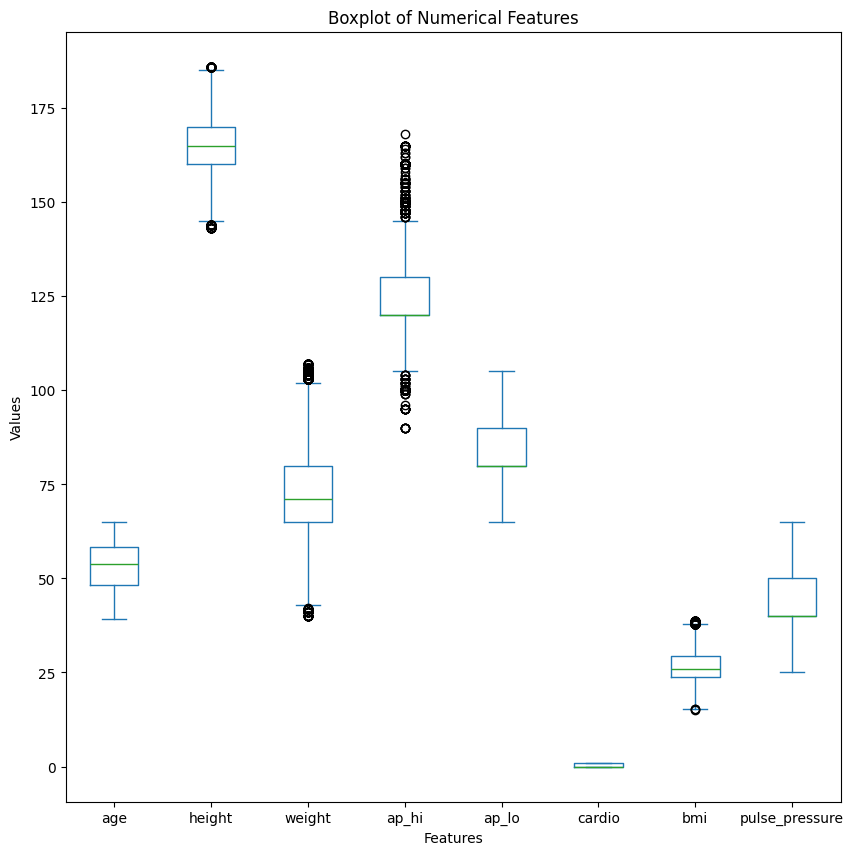

In [29]:
ax = df.select_dtypes(include=np.number).drop('id', axis=1).plot(kind='box', figsize=(10, 10))
ax.set_title('Boxplot of Numerical Features')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
plt.show()

Now, the outliers have been removed, this will delete some data instances, but we now have quality data.

Let's save the dataset at this point as the quality data that we have.

In [30]:
if not os.path.exists('../datasets'):
    os.makedirs('../datasets')
df.to_csv('../datasets/quality-data.csv')

## **Multicolinearity**
Now that the dataset is in the right format, we need to drop columns that correlates with each other. This is a problem known as multicolinearity. We will also drop high cardinality columns (id in most datasets).

A heatmap plotted on the numerical features will enable us to identify this.

We also drop the `id` column since it is a high cardinality column, it does not contribute any information to the model.

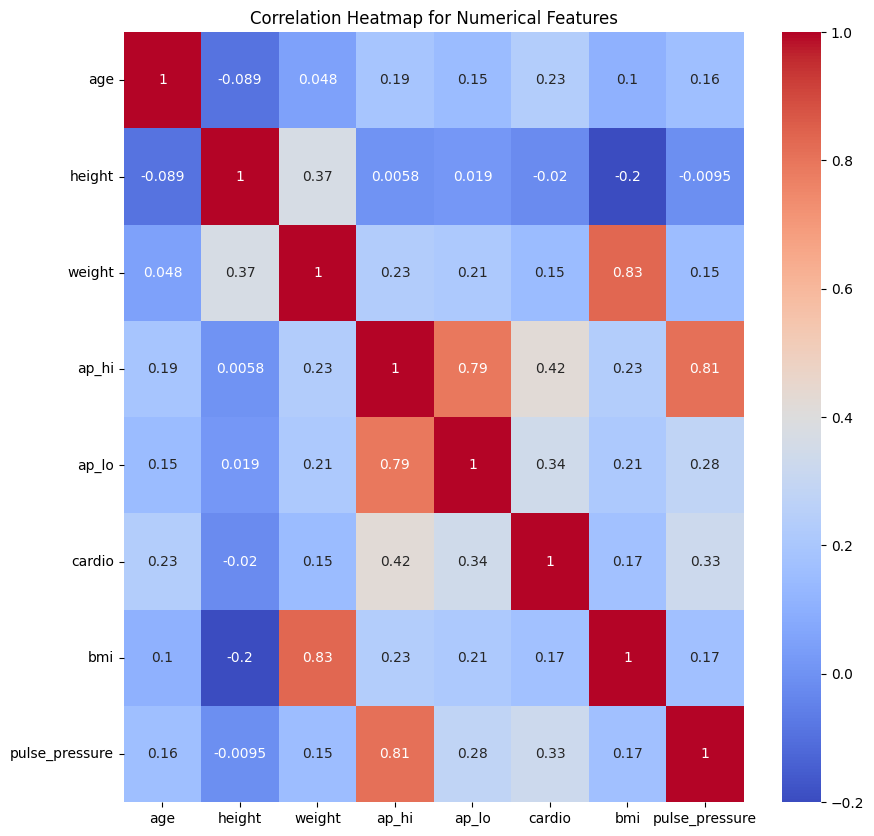

In [31]:
df.drop(columns='id', inplace=True)
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap for Numerical Features')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

- `weight` is highly correlated with `bmi` as seen but `bmi` is more informative, hence `weight` should be dropped.
- `ap_hi` and `ap_lo` are correlated with `pulse_pressure`, and since `pulse_pressure` was derived from the two, the two features can be dropped.

The code cell below saves the engineered dataset as a `csv` file. The file was downloaded locally and uploaded manually to the `data/` directory of the GitHub repository.

In [32]:
df.drop(columns=['weight', 'ap_hi', 'ap_lo'], inplace=True)

Let's visualize the correlation matrix again to see the result of our transformation.

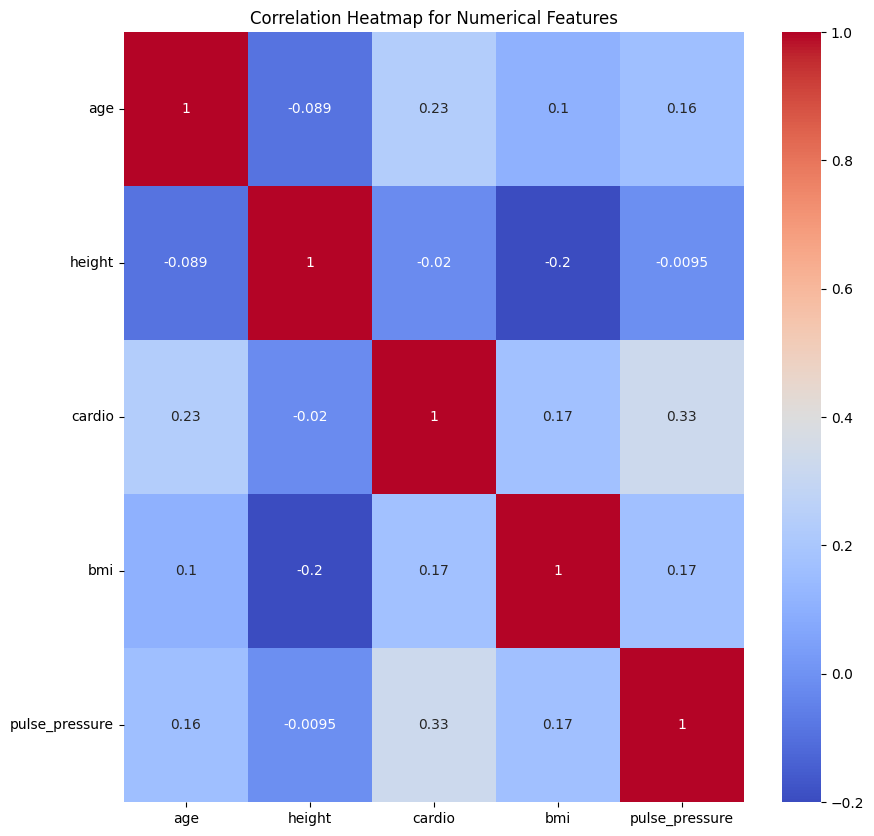

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap for Numerical Features')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [34]:
df.to_csv('../datasets/engineered.csv', index=False)

## **End of Feature Engineering**

In this notebook, we successfully engineered several new features from the original dataset, including:

* **Body Mass Index (BMI):** A measure of body weight relative to height.
* **Age in Years:** Converting age from days to a more interpretable unit.
* **Age Group:** Categorizing age into broader life stages.
* **Blood Pressure Category:** Segmenting blood pressure readings into clinically relevant groups based on AHA guidelines.

These newly created features aim to provide the machine learning model with potentially more informative representations of the underlying data, which could lead to improved predictive performance for cardiovascular disease risk.

## **Next Step**

The subsequent steps in your model development phase include:

1.  **One-Hot Encoding:** Convert the categorical features (like `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`, `age_group`, and `blood_pressure_category`) into a numerical format suitable for machine learning algorithms.

2.  **Standard Scaling:** Scale the numerical features (like `age_years`, `height`, `weight`, `bmi`, `ap_hi`, `ap_lo`, and `pulse_pressure` to have zero mean and unit variance. This is important for many machine learning algorithms to prevent features with larger ranges from dominating the learning process.

3.  **Label Encoding:** The target variable `cardio` is already binary (0 and 1).

4. **Feature Selection**: Dynamically select the features that are most relevant to the model development and which gives the optimal result. Though, this step is a part of feature engineering, but it has been shifted to the model development phase to couple with the training pipeline. We will use the `f_classic` function from the `sklearn` module. This computes the ANOVA f-value for the provided dataset, and measure linear dependencies between the features and the target categorical variable. It performs univariate selection and compares group mean.

**Muyiwa J. Obadara**<br>
[https://linkedin.com/in/obadara-m](https://linkedin.com/in/obadara-m)

**Reference:**

> American Heart Association. (n.d.). *Understanding Blood Pressure Readings*. Retrieved from [https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

> Mayo Clinic (n.d.). *Pulse pressure: An indicator of a heart health*. Retrieved from [https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/pulse-pressure/faq-20058189)